<a href="https://colab.research.google.com/github/kur2022/backtest_engine/blob/main/Backtest_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yfinance pandas matplotlib

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbol = "^NSEBANK"
data = yf.download(symbol, interval="15m", period="5d")
data = data.dropna()

def strategy_logic(row):
    # Access the scalar values using .loc and the row index
    open_price = data.loc[row.name, ('Price', 'Open')]
    close_price = data.loc[row.name, ('Price', 'Close')]

    if close_price > open_price * 1.002:
        return 'Buy'
    elif close_price < open_price * 0.998:
        return 'Sell'
    else:
        return 'Hold'

data['Signal'] = data.apply(strategy_logic, axis=1)
data['Return'] = 0.0

for i in range(1, len(data)):
    if data['Signal'].iloc[i] == 'Buy':
        data.at[data.index[i], 'Return'] = data[('Price', 'Close')].iloc[i] - data[('Price', 'Open')].iloc[i]
    elif data['Signal'].iloc[i] == 'Sell':
        data.at[data.index[i], 'Return'] = data[('Price', 'Open')].iloc[i] - data[('Price', 'Close')].iloc[i]


data['Cumulative'] = data['Return'].cumsum()
total_trades = len(data[data['Signal'] != 'Hold'])
profitable_trades = len(data[data['Return'] > 0])
win_rate = profitable_trades / total_trades * 100 if total_trades > 0 else 0
total_profit = data['Return'].sum()

print(f"Total Trades: {total_trades}")
print(f"Win Rate: {win_rate:.2f}%")
print(f"Total Profit: ₹{total_profit:.2f}")

plt.figure(figsize=(10,5))
plt.plot(data.index, data['Cumulative'], label='Equity Curve')
plt.title('Backtest Equity Curve')
plt.xlabel('Time')
plt.ylabel('Cumulative Profit')
plt.legend()
plt.grid()
plt.show()

/tmp/ipython-input-1520424203.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, interval="15m", period="5d")
[*********************100%***********************]  1 of 1 completed


KeyError: ('Price', 'Open')

In [12]:
print(data.columns)

MultiIndex([( 'Close', '^NSEBANK'),
            (  'High', '^NSEBANK'),
            (   'Low', '^NSEBANK'),
            (  'Open', '^NSEBANK'),
            ('Volume', '^NSEBANK')],
           names=['Price', 'Ticker'])


In [13]:
data.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in data.columns]
print(data.columns)

Index(['Close_^NSEBANK', 'High_^NSEBANK', 'Low_^NSEBANK', 'Open_^NSEBANK',
       'Volume_^NSEBANK'],
      dtype='object')


In [14]:
def strategy_logic(row):
    open_price = row['Price_Open']
    close_price = row['Price_Close']
    ...

In [15]:
def strategy_logic(row):
    open_price = row['Open']
    close_price = row['Close']
    ...

In [23]:
def run_backtest(data, strategy_logic):
    data = data.copy()
    data['Signal'] = data.apply(strategy_logic, axis=1)
    data['Return'] = 0.0

    for i in range(1, len(data)):
        if data['Signal'].iloc[i] == 'Buy':
            data.at[data.index[i], 'Return'] = data['Close_^NSEBANK'].iloc[i] - data['Open_^NSEBANK'].iloc[i]
        elif data['Signal'].iloc[i] == 'Sell':
            data.at[data.index[i], 'Return'] = data['Open_^NSEBANK'].iloc[i] - data['Close_^NSEBANK'].iloc[i]

    data['Cumulative'] = data['Return'].cumsum()
    total_trades = len(data[data['Signal'] != 'Hold'])
    profitable_trades = len(data[data['Return'] > 0])
    win_rate = profitable_trades / total_trades * 100 if total_trades > 0 else 0
    total_profit = data['Return'].sum()

    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total Profit: ₹{total_profit:.2f}")

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['Cumulative'], label='Equity Curve')
    plt.title('Backtest Equity Curve')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Profit')
    plt.legend()
    plt.grid()
    plt.show()

    return {
        "total_trades": total_trades,
        "win_rate": win_rate,
        "total_profit": total_profit,
        "data": data
    }

In [25]:
def sample_strategy(row):
    open_price = row['Open_^NSEBANK']
    close_price = row['Close_^NSEBANK']

    if close_price > open_price * 1.002:
        return 'Buy'
    elif close_price < open_price * 0.998:
        return 'Sell'
    else:
        return 'Hold'

In [18]:
def run_backtest(data, strategy_logic):
    data = data.copy()
    data['Signal'] = data.apply(strategy_logic, axis=1)
    data['Return'] = 0.0

    for i in range(1, len(data)):
        if data['Signal'].iloc[i] == 'Buy':
            data.at[data.index[i], 'Return'] = data['Close'].iloc[i] - data['Open'].iloc[i]
        elif data['Signal'].iloc[i] == 'Sell':
            data.at[data.index[i], 'Return'] = data['Open'].iloc[i] - data['Close'].iloc[i]

    data['Cumulative'] = data['Return'].cumsum()
    total_trades = len(data[data['Signal'] != 'Hold'])
    profitable_trades = len(data[data['Return'] > 0])
    win_rate = profitable_trades / total_trades * 100 if total_trades > 0 else 0
    total_profit = data['Return'].sum()

    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total Profit: ₹{total_profit:.2f}")

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['Cumulative'], label='Equity Curve')
    plt.title('Backtest Equity Curve')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Profit')
    plt.legend()
    plt.grid()
    plt.show()

    return {
        "total_trades": total_trades,
        "win_rate": win_rate,
        "total_profit": total_profit,
        "data": data
    }

In [26]:
def sample_strategy(row):
    open_price = row['Open_^NSEBANK']
    close_price = row['Close_^NSEBANK']

    if close_price > open_price * 1.002:
        return 'Buy'
    elif close_price < open_price * 0.998:
        return 'Sell'
    else:
        return 'Hold'

In [20]:
print(data.columns)


Index(['Close_^NSEBANK', 'High_^NSEBANK', 'Low_^NSEBANK', 'Open_^NSEBANK',
       'Volume_^NSEBANK'],
      dtype='object')


In [21]:
def sample_strategy(row):
    open_price = row['Open_^NSEBANK']
    close_price = row['Close_^NSEBANK']

    if close_price > open_price * 1.002:
        return 'Buy'
    elif close_price < open_price * 0.998:
        return 'Sell'
    else:
        return 'Hold'

Total Trades: 6
Win Rate: 83.33%
Total Profit: ₹719.55


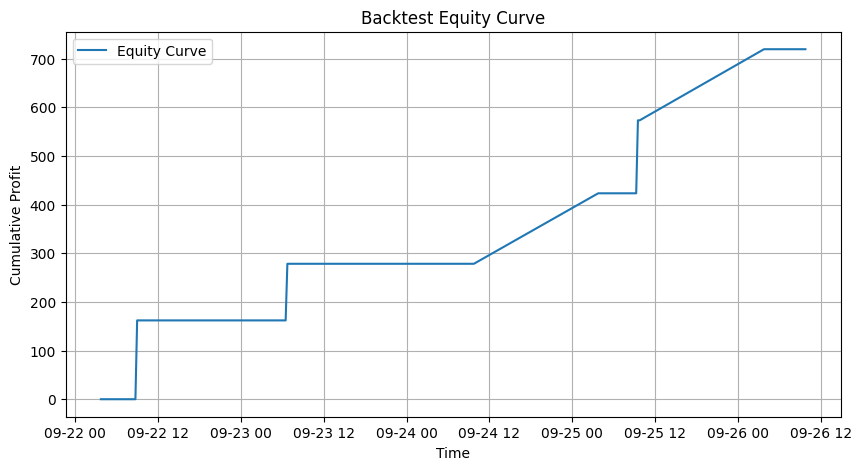

In [27]:
results = run_backtest(data, sample_strategy)


🔍 Testing Strategy 001
Total Trades: 8
Win Rate: 87.50%
Total Profit: ₹634.09


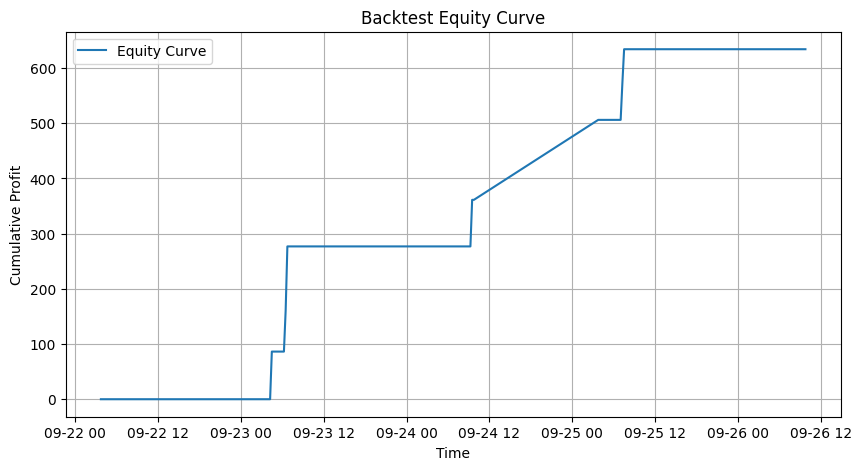


🔍 Testing Strategy 002
Total Trades: 17
Win Rate: 100.00%
Total Profit: ₹1551.30


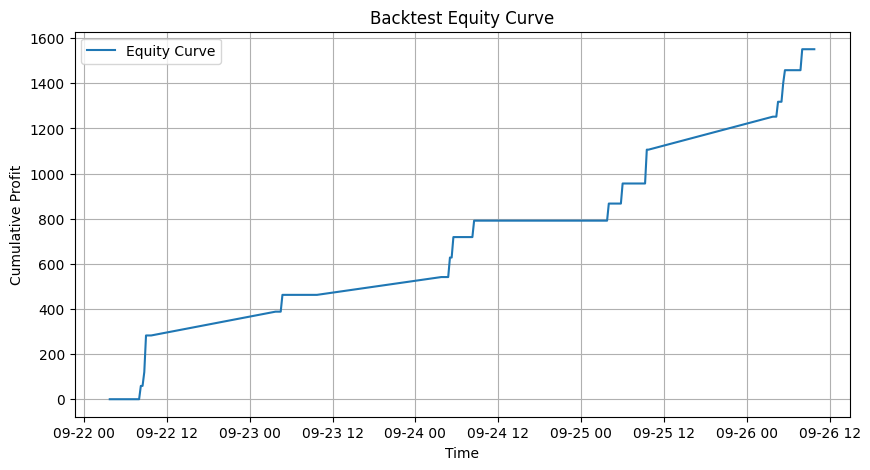


🔍 Testing Strategy 003
Total Trades: 6
Win Rate: 83.33%
Total Profit: ₹719.55


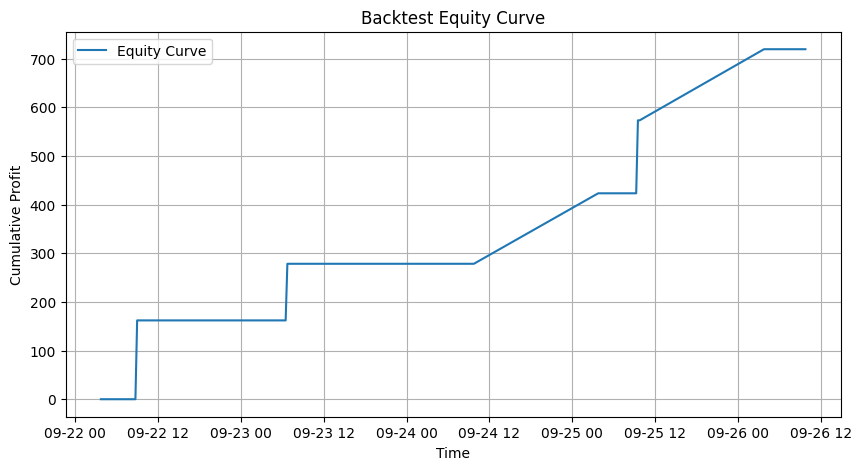


📊 Strategy Comparison:
           name    win_rate  total_profit
1  Strategy 002  100.000000   1551.300781
2  Strategy 003   83.333333    719.550781
0  Strategy 001   87.500000    634.093750


In [28]:
# 📌 Define multiple strategy variations
def strategy_001(row):
    return 'Buy' if row['Close_^NSEBANK'] > row['Open_^NSEBANK'] * 1.001 else 'Hold'

def strategy_002(row):
    return 'Sell' if row['Close_^NSEBANK'] < row['Open_^NSEBANK'] * 0.999 else 'Hold'

def strategy_003(row):
    if row['Close_^NSEBANK'] > row['Open_^NSEBANK'] * 1.002:
        return 'Buy'
    elif row['Close_^NSEBANK'] < row['Open_^NSEBANK'] * 0.998:
        return 'Sell'
    else:
        return 'Hold'

# 📌 Run backtest for each strategy
strategies = {
    "Strategy 001": strategy_001,
    "Strategy 002": strategy_002,
    "Strategy 003": strategy_003
}

results_summary = []

for name, logic in strategies.items():
    print(f"\n🔍 Testing {name}")
    result = run_backtest(data, logic)
    results_summary.append({
        "name": name,
        "win_rate": result["win_rate"],
        "total_profit": result["total_profit"]
    })

# 📌 Show summary
summary_df = pd.DataFrame(results_summary)
print("\n📊 Strategy Comparison:")
print(summary_df.sort_values(by="total_profit", ascending=False))

In [29]:
def strategy(row, buy_thresh=1.002, sell_thresh=0.998):
    if row['Close_^NSEBANK'] > row['Open_^NSEBANK'] * buy_thresh:
        return 'Buy'
    elif row['Close_^NSEBANK'] < row['Open_^NSEBANK'] * sell_thresh:
        return 'Sell'
    else:
        return 'Hold'

Total Trades: 25
Win Rate: 96.00%
Total Profit: ₹2185.39


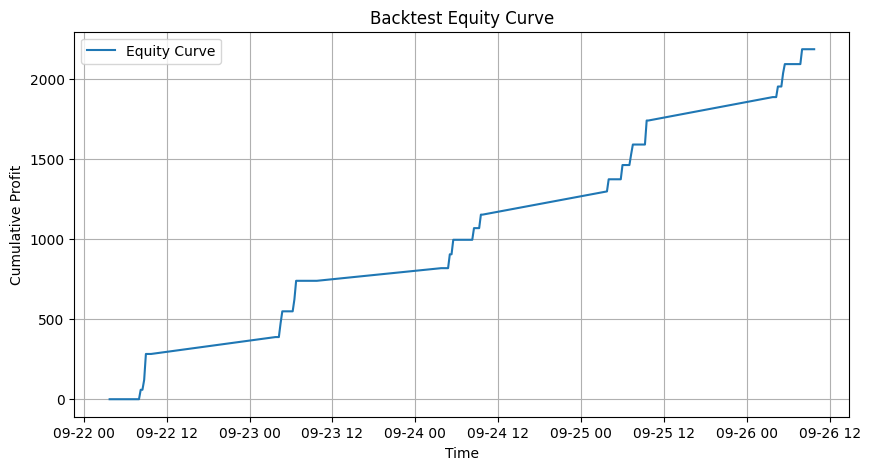

Buy>1.001, Sell<0.999 → Profit ₹2185.39, Win Rate 96.00%
Total Trades: 11
Win Rate: 90.91%
Total Profit: ₹1092.34


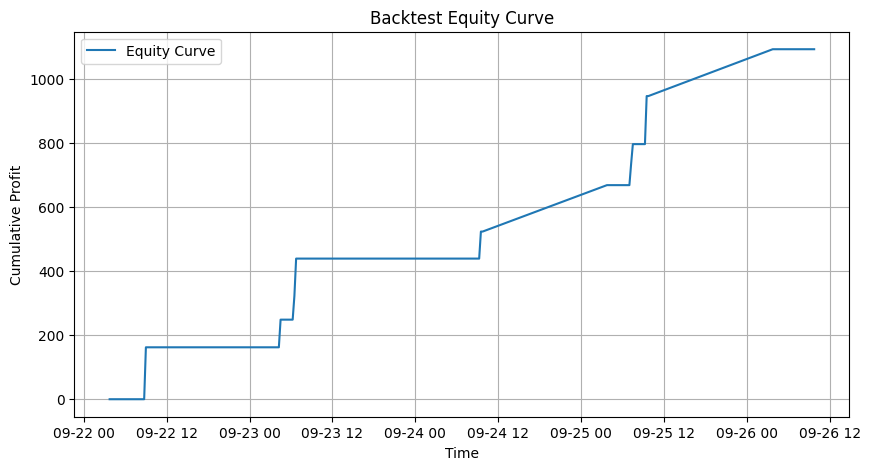

Buy>1.001, Sell<0.998 → Profit ₹1092.34, Win Rate 90.91%
Total Trades: 8
Win Rate: 87.50%
Total Profit: ₹634.09


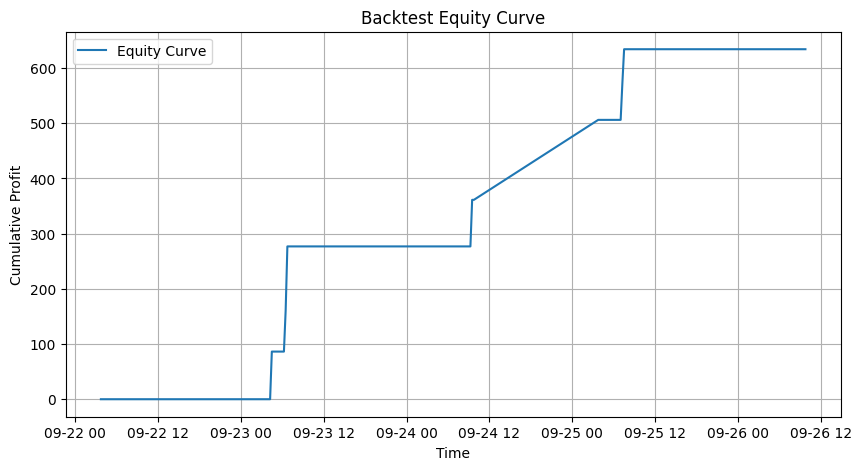

Buy>1.001, Sell<0.997 → Profit ₹634.09, Win Rate 87.50%
Total Trades: 20
Win Rate: 95.00%
Total Profit: ₹1812.60


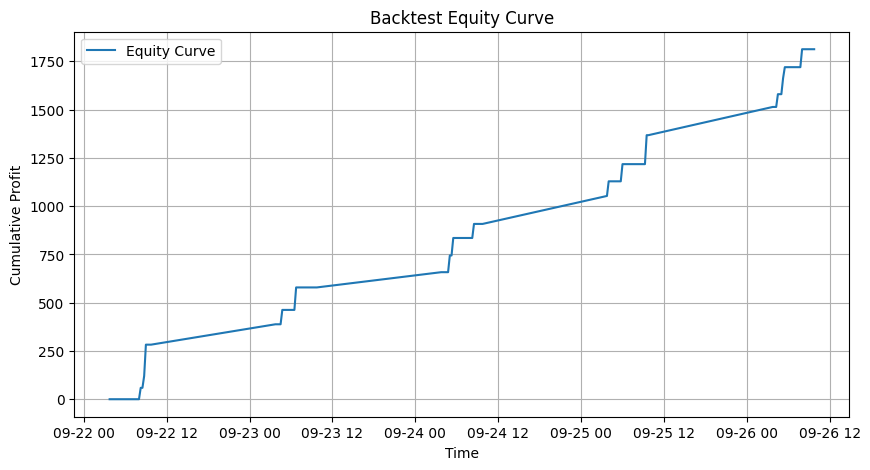

Buy>1.002, Sell<0.999 → Profit ₹1812.60, Win Rate 95.00%
Total Trades: 6
Win Rate: 83.33%
Total Profit: ₹719.55


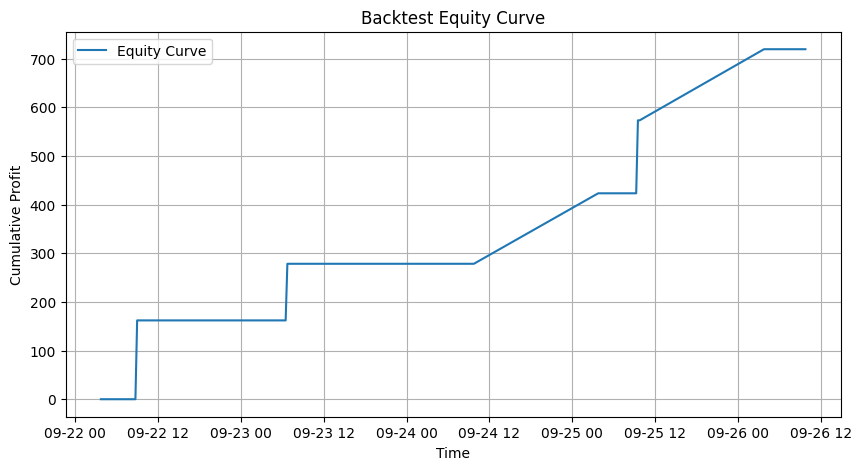

Buy>1.002, Sell<0.998 → Profit ₹719.55, Win Rate 83.33%
Total Trades: 3
Win Rate: 66.67%
Total Profit: ₹261.30


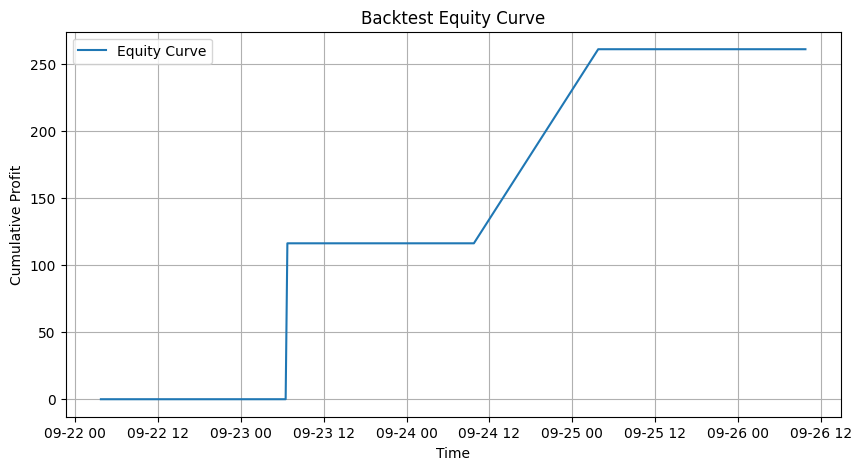

Buy>1.002, Sell<0.997 → Profit ₹261.30, Win Rate 66.67%
Total Trades: 17
Win Rate: 100.00%
Total Profit: ₹1551.30


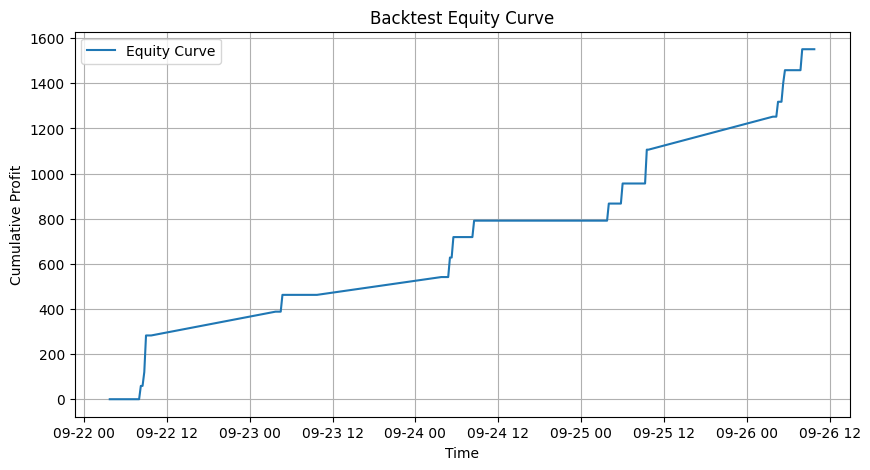

Buy>1.003, Sell<0.999 → Profit ₹1551.30, Win Rate 100.00%
Total Trades: 3
Win Rate: 100.00%
Total Profit: ₹458.25


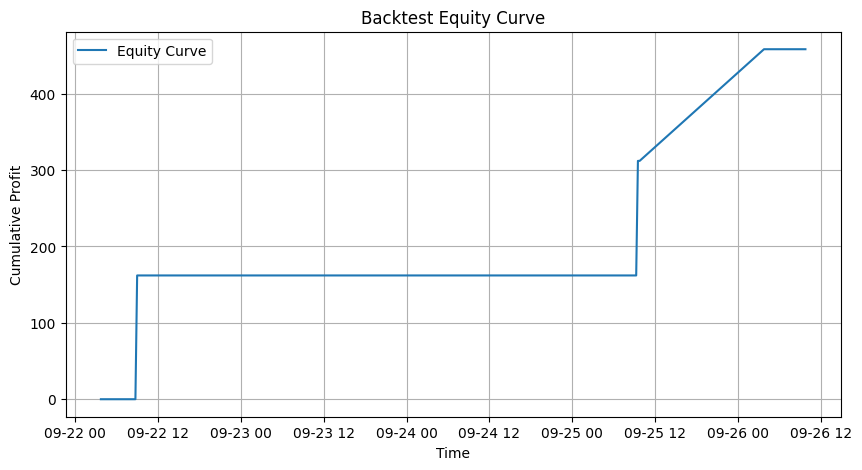

Buy>1.003, Sell<0.998 → Profit ₹458.25, Win Rate 100.00%
Total Trades: 0
Win Rate: 0.00%
Total Profit: ₹0.00


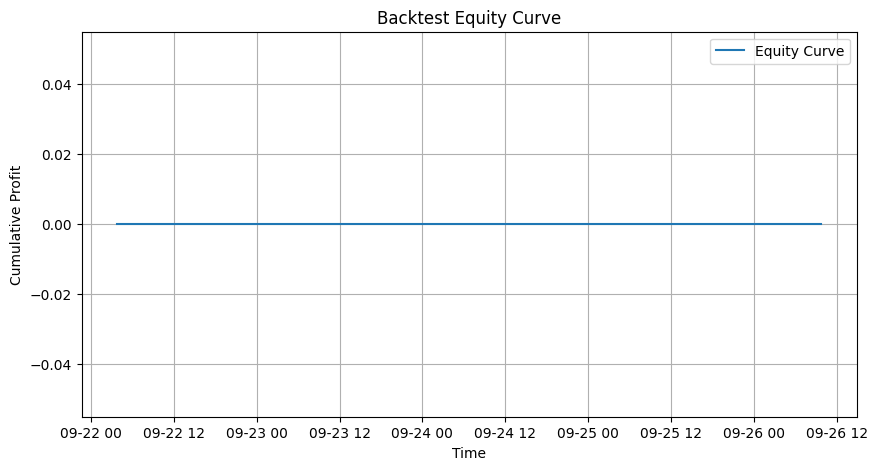

Buy>1.003, Sell<0.997 → Profit ₹0.00, Win Rate 0.00%


In [30]:
buy_levels = [1.001, 1.002, 1.003]
sell_levels = [0.999, 0.998, 0.997]

for b in buy_levels:
    for s in sell_levels:
        def dynamic_strategy(row, b=b, s=s):
            if row['Close_^NSEBANK'] > row['Open_^NSEBANK'] * b:
                return 'Buy'
            elif row['Close_^NSEBANK'] < row['Open_^NSEBANK'] * s:
                return 'Sell'
            else:
                return 'Hold'

        result = run_backtest(data, dynamic_strategy)
        print(f"Buy>{b}, Sell<{s} → Profit ₹{result['total_profit']:.2f}, Win Rate {result['win_rate']:.2f}%")


🔍 Testing Buy>1.001, Sell<0.999
Total Trades: 25
Win Rate: 96.00%
Total Profit: ₹2185.39


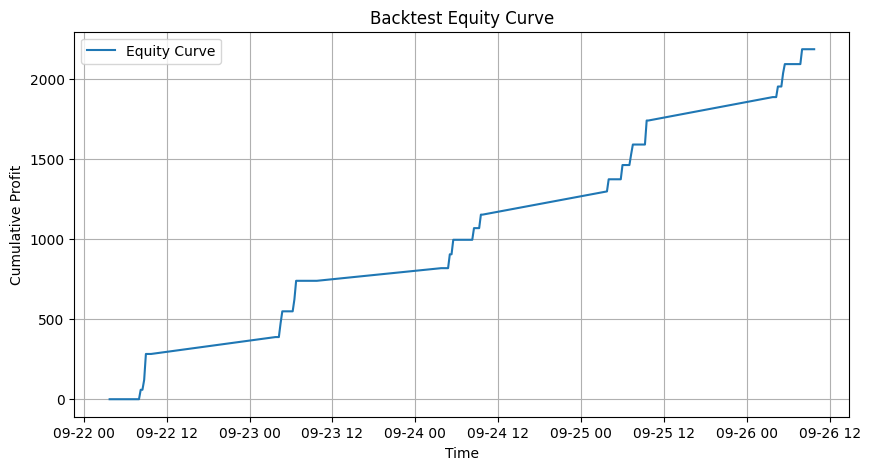

Profit ₹2185.39, Win Rate 96.00%

🔍 Testing Buy>1.001, Sell<0.998
Total Trades: 11
Win Rate: 90.91%
Total Profit: ₹1092.34


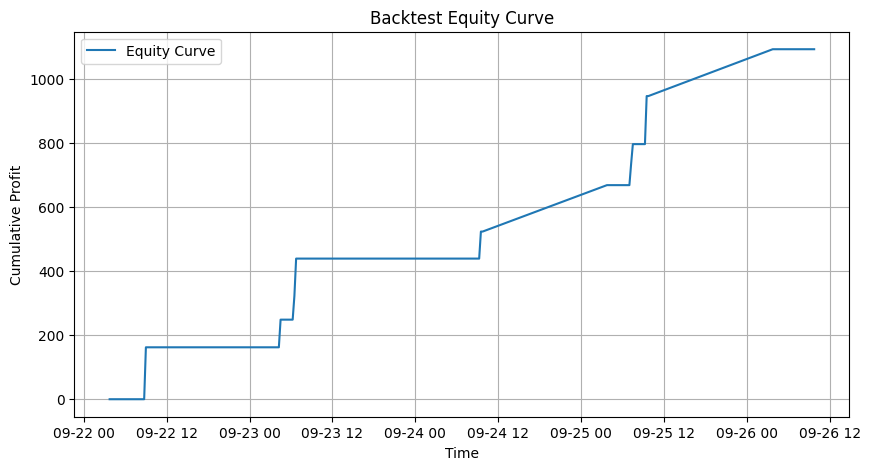

Profit ₹1092.34, Win Rate 90.91%

🔍 Testing Buy>1.001, Sell<0.997
Total Trades: 8
Win Rate: 87.50%
Total Profit: ₹634.09


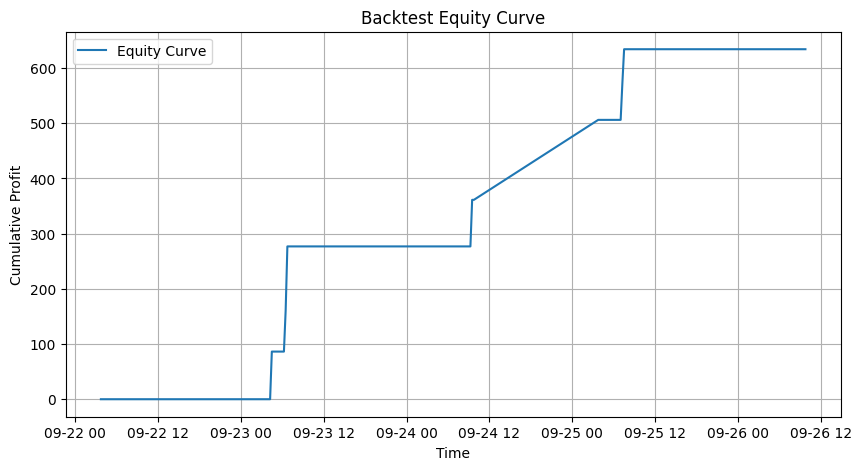

Profit ₹634.09, Win Rate 87.50%

🔍 Testing Buy>1.002, Sell<0.999
Total Trades: 20
Win Rate: 95.00%
Total Profit: ₹1812.60


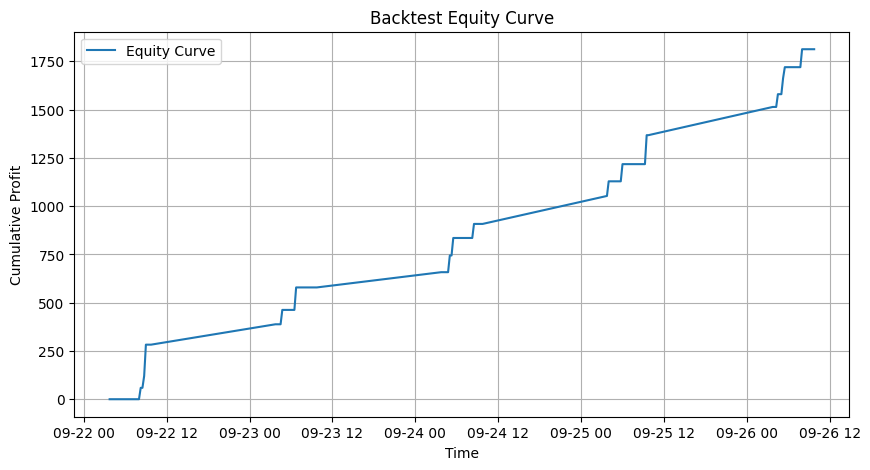

Profit ₹1812.60, Win Rate 95.00%

🔍 Testing Buy>1.002, Sell<0.998
Total Trades: 6
Win Rate: 83.33%
Total Profit: ₹719.55


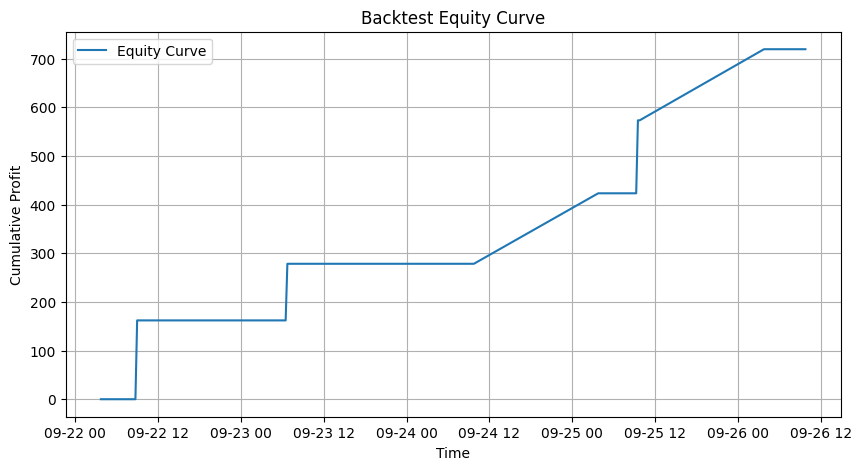

Profit ₹719.55, Win Rate 83.33%

🔍 Testing Buy>1.002, Sell<0.997
Total Trades: 3
Win Rate: 66.67%
Total Profit: ₹261.30


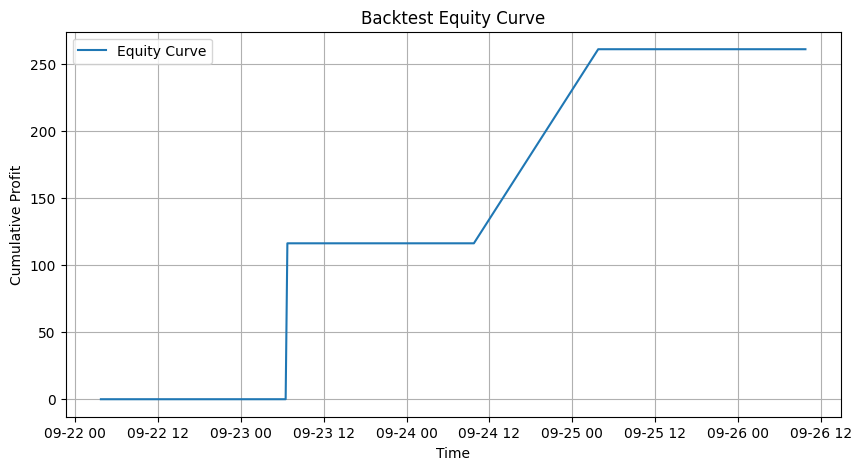

Profit ₹261.30, Win Rate 66.67%

🔍 Testing Buy>1.003, Sell<0.999
Total Trades: 17
Win Rate: 100.00%
Total Profit: ₹1551.30


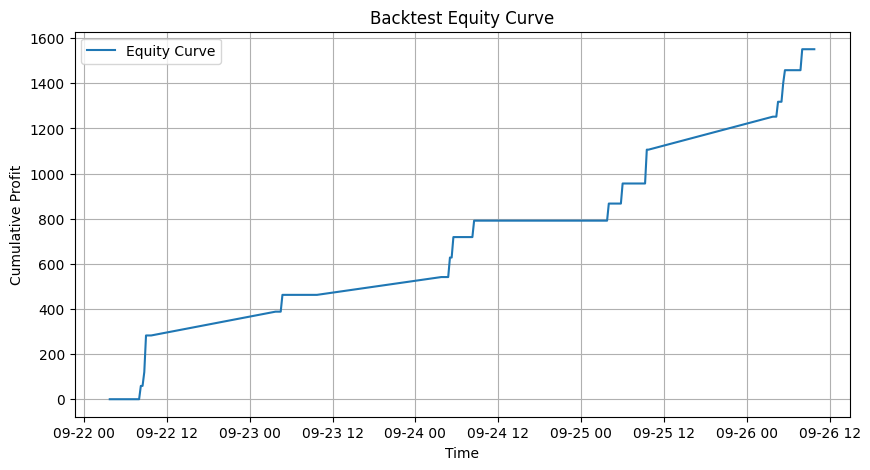

Profit ₹1551.30, Win Rate 100.00%

🔍 Testing Buy>1.003, Sell<0.998
Total Trades: 3
Win Rate: 100.00%
Total Profit: ₹458.25


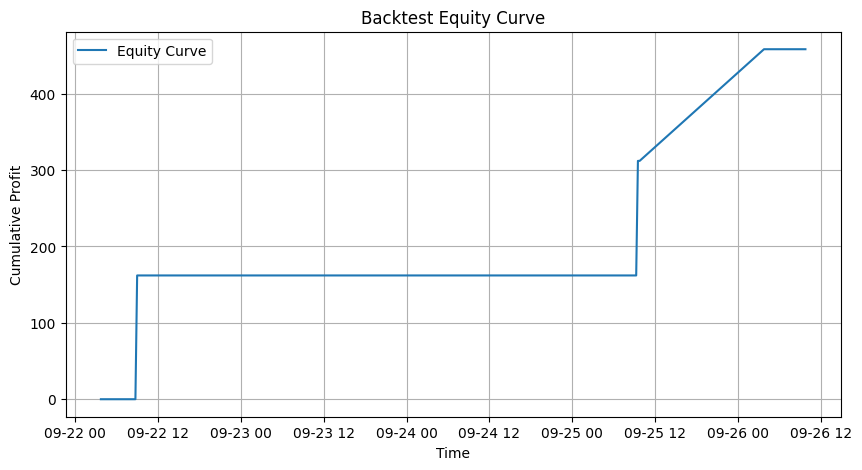

Profit ₹458.25, Win Rate 100.00%

🔍 Testing Buy>1.003, Sell<0.997
Total Trades: 0
Win Rate: 0.00%
Total Profit: ₹0.00


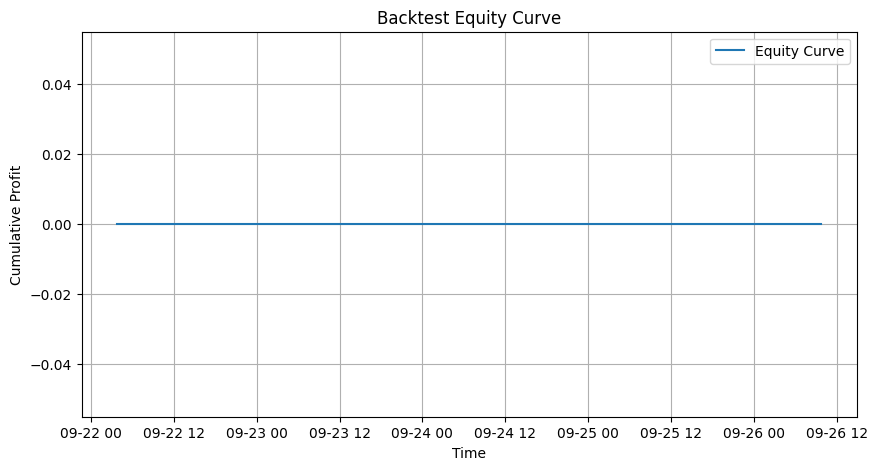

Profit ₹0.00, Win Rate 0.00%


In [33]:
# from strategy_generator import generate_rule_based_strategies
# from backtest_engine import run_backtest # run_backtest is already defined in the notebook

buy_levels = [1.001, 1.002, 1.003]
sell_levels = [0.999, 0.998, 0.997]

strategies = generate_rule_based_strategies(buy_levels, sell_levels)

for strat in strategies:
    print(f"\n🔍 Testing {strat['name']}")
    result = run_backtest(data, strat['logic'])
    print(f"Profit ₹{result['total_profit']:.2f}, Win Rate {result['win_rate']:.2f}%")

In [34]:
def generate_rule_based_strategies(buy_levels, sell_levels):
    strategies = []
    for b in buy_levels:
        for s in sell_levels:
            def strategy_logic(row, buy_thresh=b, sell_thresh=s):
                if row['Close_^NSEBANK'] > row['Open_^NSEBANK'] * buy_thresh:
                    return 'Buy'
                elif row['Close_^NSEBANK'] < row['Open_^NSEBANK'] * sell_thresh:
                    return 'Sell'
                else:
                    return 'Hold'
            strategies.append({
                "name": f"Buy>{b}, Sell<{s}",
                "logic": strategy_logic
            })
    return strategies


🔍 Testing Buy>1.001, Sell<0.999
Total Trades: 25
Win Rate: 96.00%
Total Profit: ₹2185.39


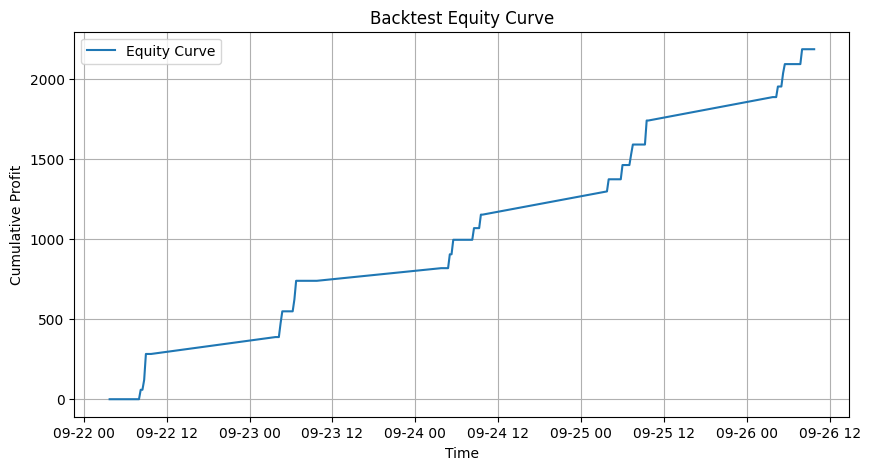

Profit ₹2185.39, Win Rate 96.00%

🔍 Testing Buy>1.001, Sell<0.998
Total Trades: 11
Win Rate: 90.91%
Total Profit: ₹1092.34


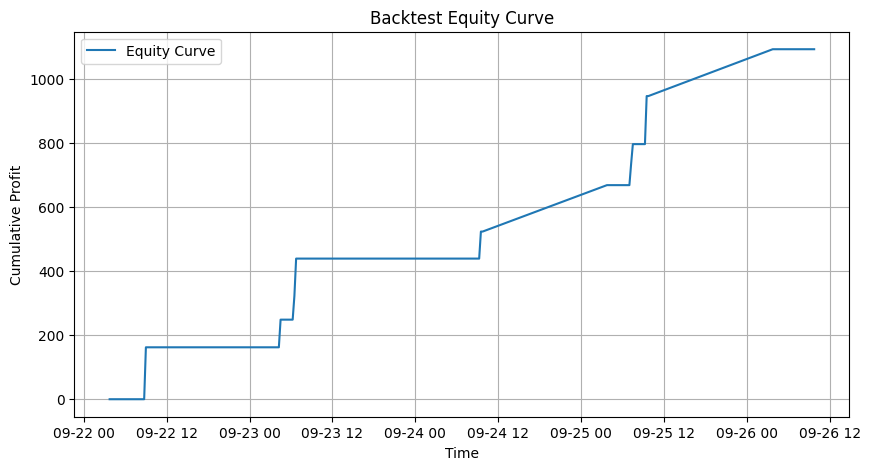

Profit ₹1092.34, Win Rate 90.91%

🔍 Testing Buy>1.001, Sell<0.997
Total Trades: 8
Win Rate: 87.50%
Total Profit: ₹634.09


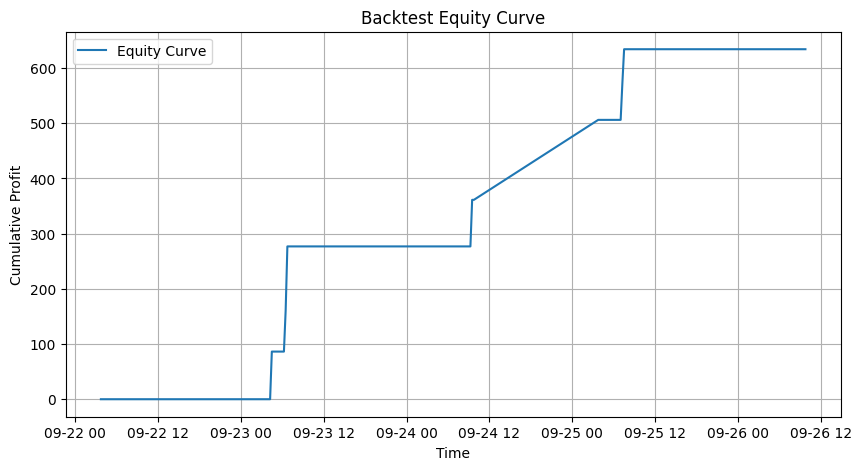

Profit ₹634.09, Win Rate 87.50%

🔍 Testing Buy>1.002, Sell<0.999
Total Trades: 20
Win Rate: 95.00%
Total Profit: ₹1812.60


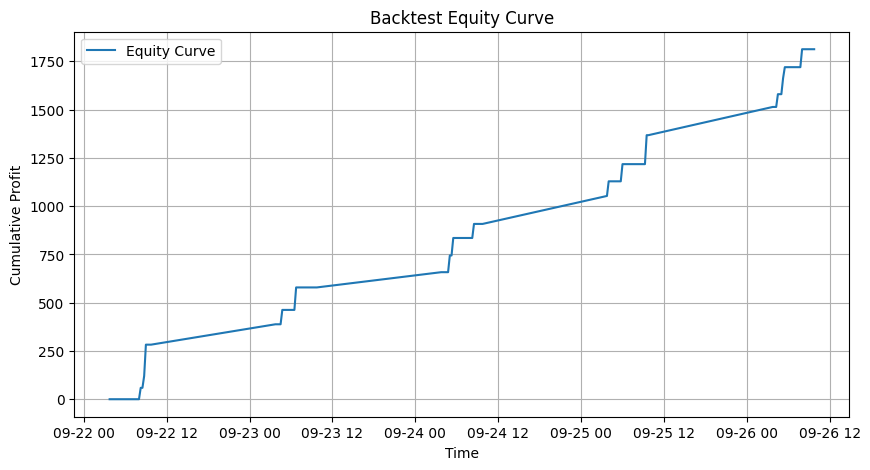

Profit ₹1812.60, Win Rate 95.00%

🔍 Testing Buy>1.002, Sell<0.998
Total Trades: 6
Win Rate: 83.33%
Total Profit: ₹719.55


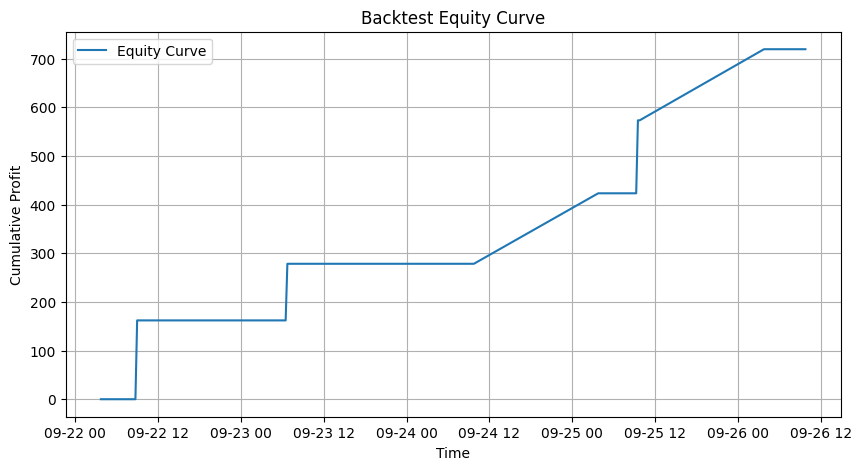

Profit ₹719.55, Win Rate 83.33%

🔍 Testing Buy>1.002, Sell<0.997
Total Trades: 3
Win Rate: 66.67%
Total Profit: ₹261.30


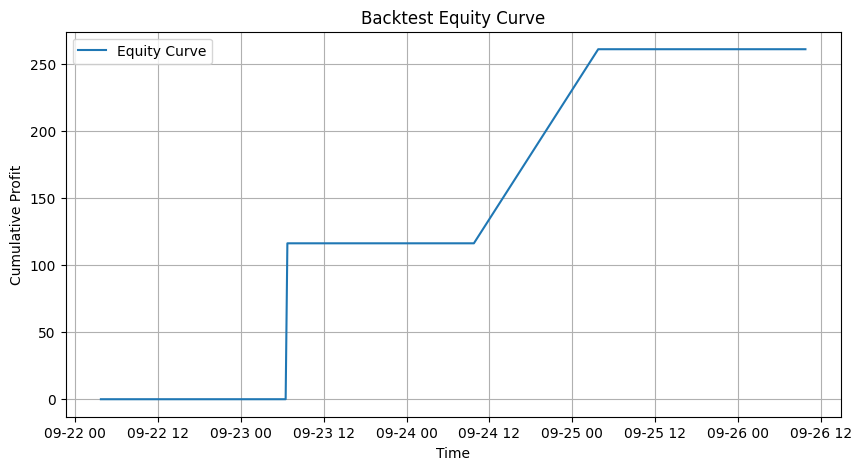

Profit ₹261.30, Win Rate 66.67%

🔍 Testing Buy>1.003, Sell<0.999
Total Trades: 17
Win Rate: 100.00%
Total Profit: ₹1551.30


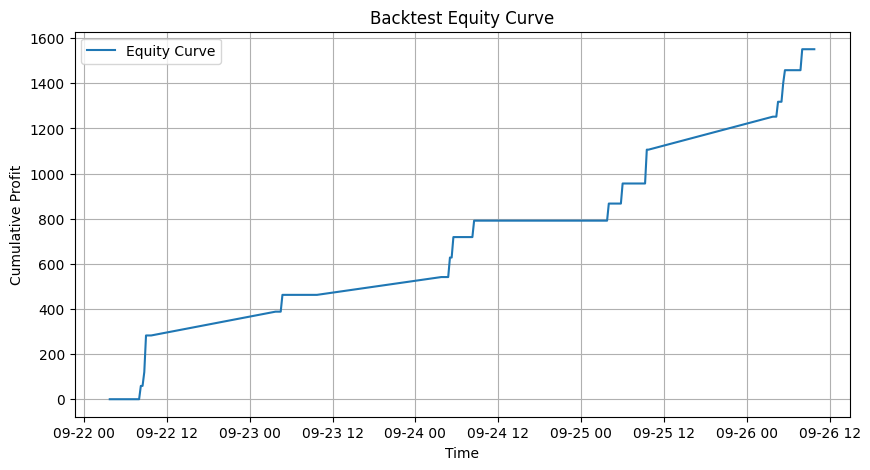

Profit ₹1551.30, Win Rate 100.00%

🔍 Testing Buy>1.003, Sell<0.998
Total Trades: 3
Win Rate: 100.00%
Total Profit: ₹458.25


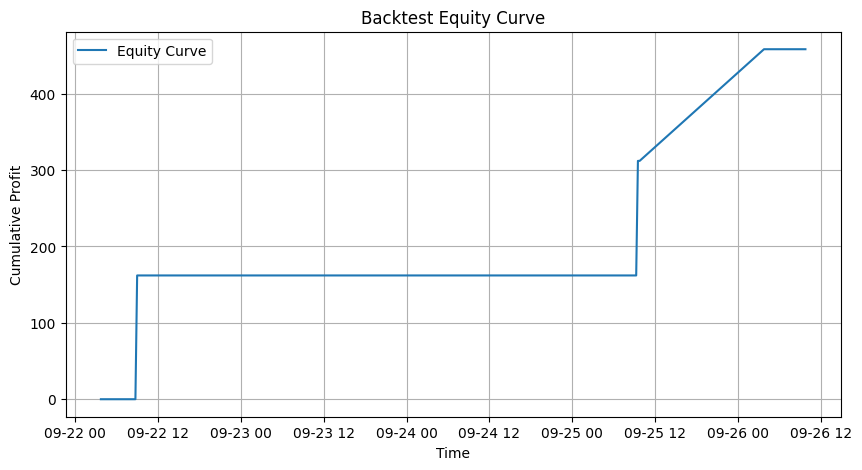

Profit ₹458.25, Win Rate 100.00%

🔍 Testing Buy>1.003, Sell<0.997
Total Trades: 0
Win Rate: 0.00%
Total Profit: ₹0.00


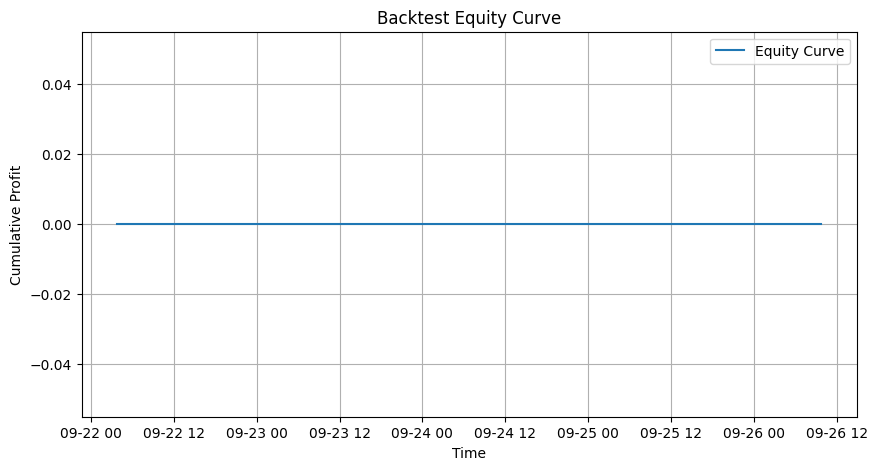

Profit ₹0.00, Win Rate 0.00%


In [36]:
# from strategy_generator import generate_rule_based_strategies
# from backtest_engine import run_backtest

buy_levels = [1.001, 1.002, 1.003]
sell_levels = [0.999, 0.998, 0.997]

strategies = generate_rule_based_strategies(buy_levels, sell_levels)

for strat in strategies:
    print(f"\n🔍 Testing {strat['name']}")
    result = run_backtest(data, strat['logic'])
    print(f"Profit ₹{result['total_profit']:.2f}, Win Rate {result['win_rate']:.2f}%")

In [39]:
# from data_loader import load_intraday_data, fetch_nse_option_chain, extract_atm_premiums

# Load OHLC data
data = load_intraday_data()

# Optionally fetch option chain
option_chain = fetch_nse_option_chain()
ce, pe, strike, spot = extract_atm_premiums(option_chain)
print(f"Spot: {spot}, ATM Strike: {strike}, CE: {ce}, PE: {pe}")

/tmp/ipython-input-3444707055.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, interval=interval, period=period)
[*********************100%***********************]  1 of 1 completed

Fetching NSE option chain data is not directly supported in this environment.
This function would typically require access to a live data feed or a web scraping mechanism.
Extracting ATM premiums requires valid option chain data.
Spot: None, ATM Strike: None, CE: None, PE: None


In [38]:
import yfinance as yf
import requests
import pandas as pd

def load_intraday_data(symbol="^NSEBANK", interval="15m", period="5d"):
    """Loads intraday data for a given symbol."""
    data = yf.download(symbol, interval=interval, period=period)
    data = data.dropna()
    # Flatten the multi-index columns if they exist
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = ['_'.join(col).strip() for col in data.columns.values]
    return data

def fetch_nse_option_chain(symbol="NIFTY"):
    """Fetches the NSE option chain data."""
    # This is a placeholder. Fetching live option chain data requires
    # interacting with specific APIs or scraping websites, which might
    # have restrictions. A direct real-time data feed would be ideal.
    # For demonstration, returning empty data.
    print("Fetching NSE option chain data is not directly supported in this environment.")
    print("This function would typically require access to a live data feed or a web scraping mechanism.")
    return pd.DataFrame() # Return an empty DataFrame as a placeholder

def extract_atm_premiums(option_chain):
    """Extracts ATM call and put premiums from the option chain."""
    # This is a placeholder based on the placeholder fetch function.
    # A real implementation would process the option_chain DataFrame
    # to find the ATM strike and corresponding premiums.
    print("Extracting ATM premiums requires valid option chain data.")
    return None, None, None, None # Return None placeholders

/tmp/ipython-input-3555128992.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, interval=interval, period=period)
[*********************100%***********************]  1 of 1 completed



🔍 Testing Buy>1.001, Sell<0.999
Total Trades: 25
Win Rate: 96.00%
Total Profit: ₹2185.39


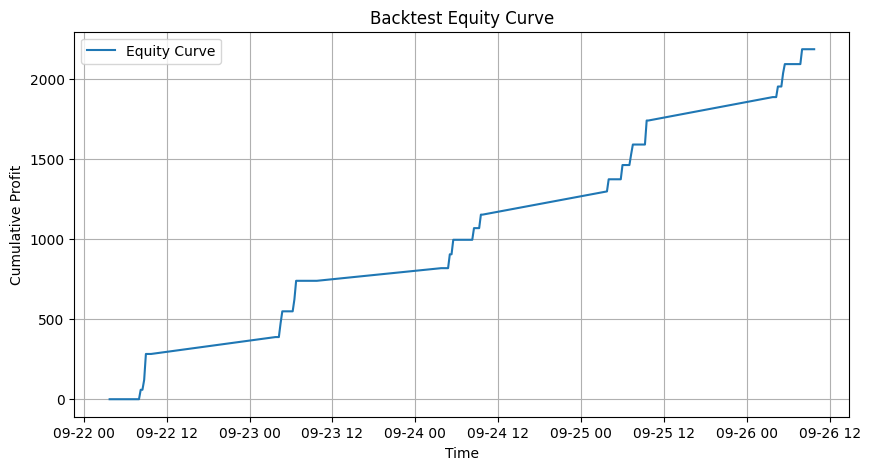

Profit ₹2185.39, Win Rate 96.00%

🔍 Testing Buy>1.001, Sell<0.998
Total Trades: 11
Win Rate: 90.91%
Total Profit: ₹1092.34


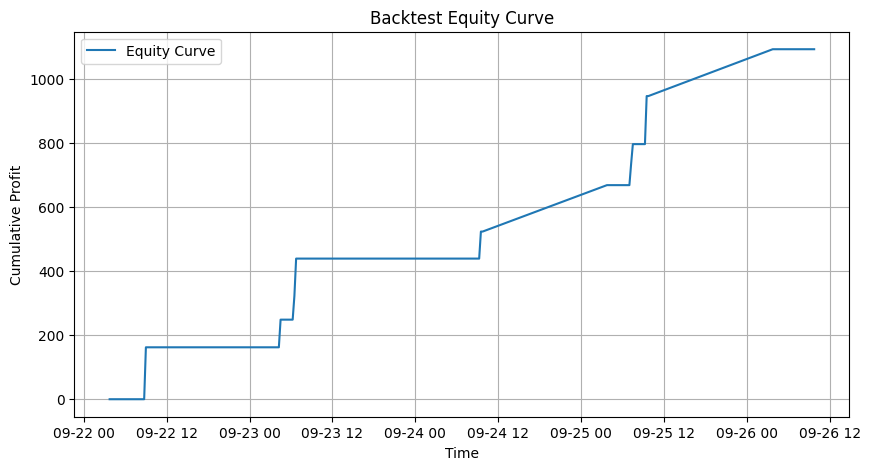

Profit ₹1092.34, Win Rate 90.91%

🔍 Testing Buy>1.001, Sell<0.997
Total Trades: 8
Win Rate: 87.50%
Total Profit: ₹634.09


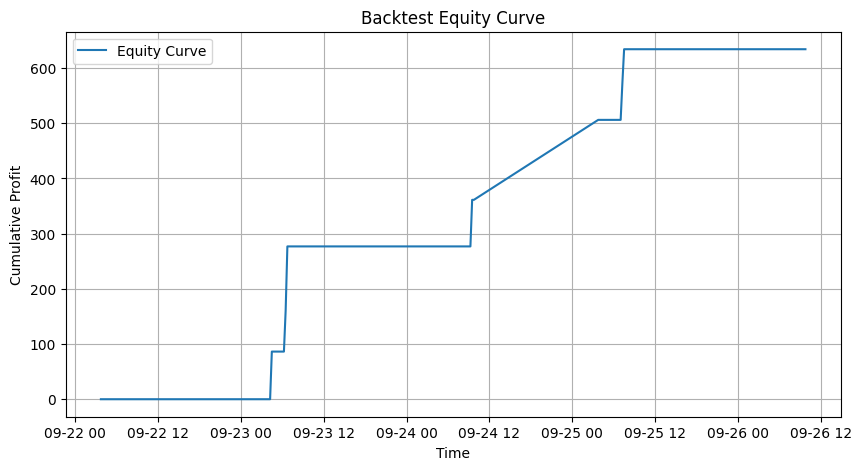

Profit ₹634.09, Win Rate 87.50%

🔍 Testing Buy>1.002, Sell<0.999
Total Trades: 20
Win Rate: 95.00%
Total Profit: ₹1812.60


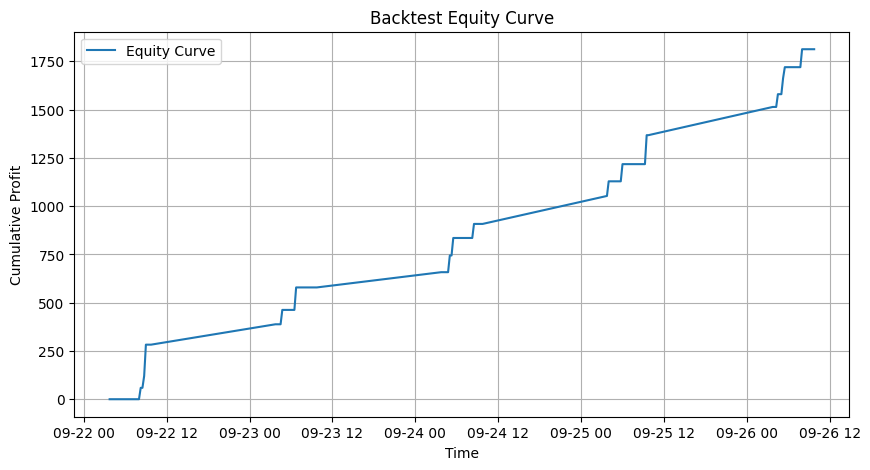

Profit ₹1812.60, Win Rate 95.00%

🔍 Testing Buy>1.002, Sell<0.998
Total Trades: 6
Win Rate: 83.33%
Total Profit: ₹719.55


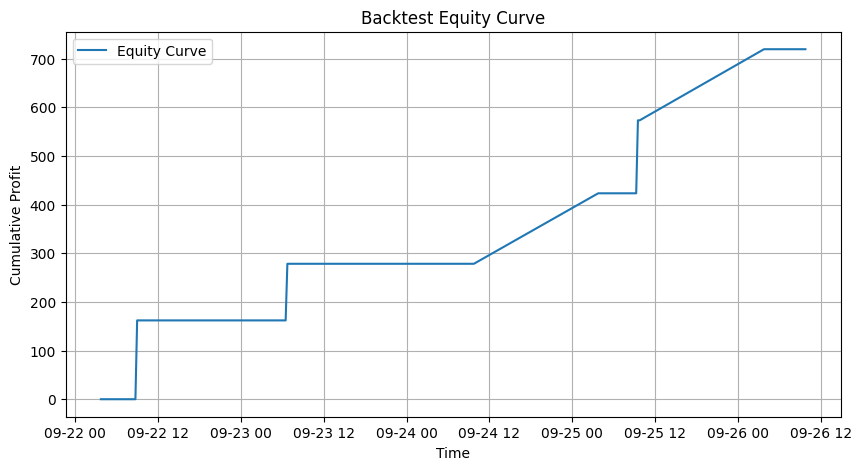

Profit ₹719.55, Win Rate 83.33%

🔍 Testing Buy>1.002, Sell<0.997
Total Trades: 3
Win Rate: 66.67%
Total Profit: ₹261.30


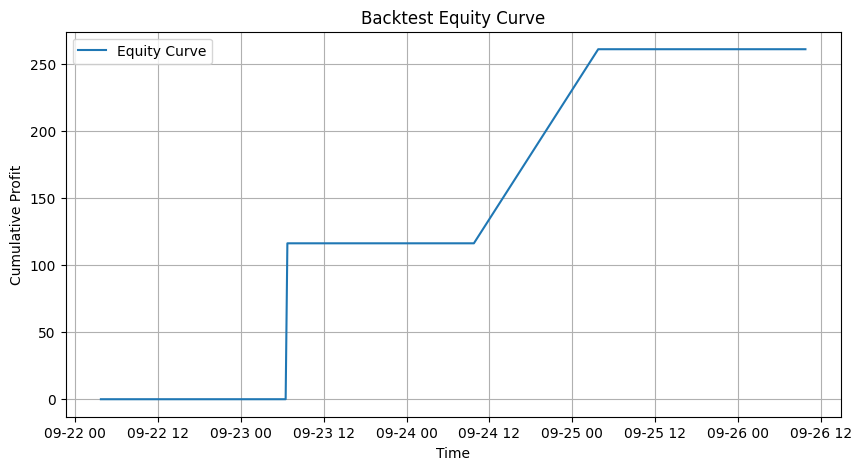

Profit ₹261.30, Win Rate 66.67%

🔍 Testing Buy>1.003, Sell<0.999
Total Trades: 17
Win Rate: 100.00%
Total Profit: ₹1551.30


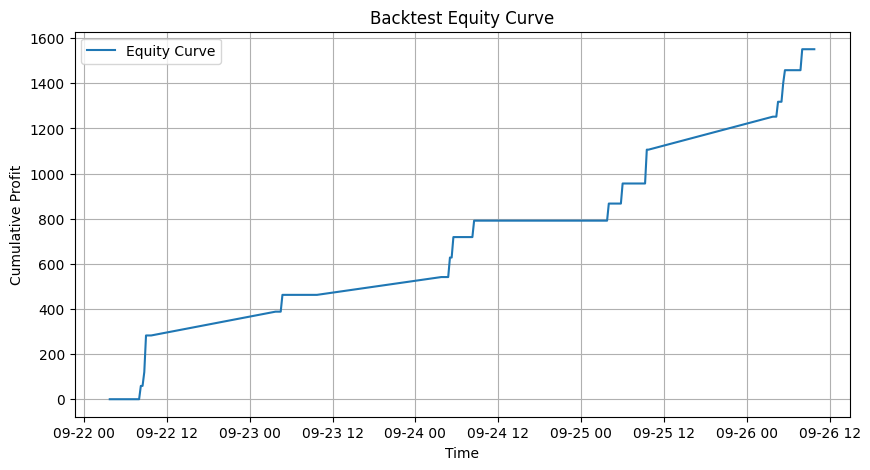

Profit ₹1551.30, Win Rate 100.00%

🔍 Testing Buy>1.003, Sell<0.998
Total Trades: 3
Win Rate: 100.00%
Total Profit: ₹458.25


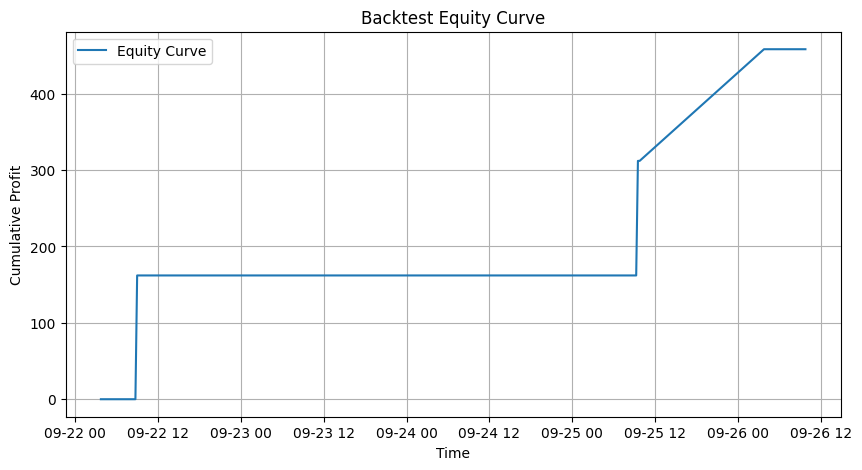

Profit ₹458.25, Win Rate 100.00%

🔍 Testing Buy>1.003, Sell<0.997
Total Trades: 0
Win Rate: 0.00%
Total Profit: ₹0.00


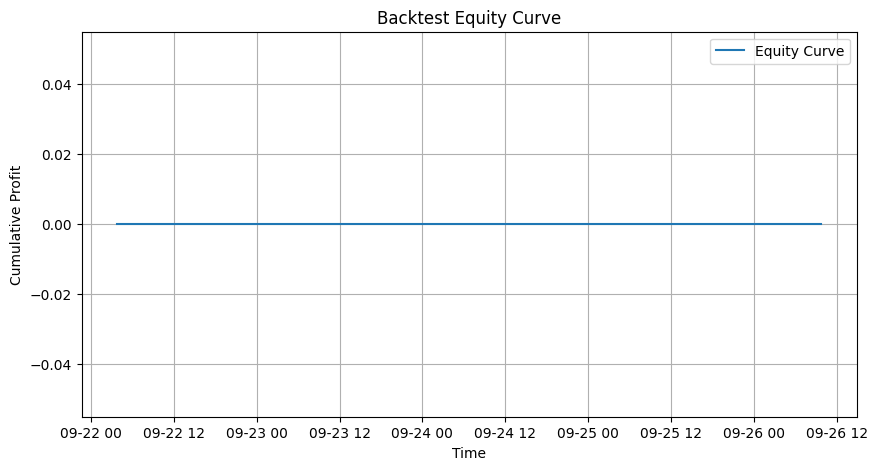

Profit ₹0.00, Win Rate 0.00%


In [45]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def load_intraday_data(symbol="^NSEBANK", interval="15m", period="5d"):
    """Loads intraday data for a given symbol."""
    data = yf.download(symbol, interval=interval, period=period)
    data = data.dropna()
    # Flatten the multi-index columns if they exist
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = ['_'.join(col).strip() for col in data.columns.values]
    return data

def generate_rule_based_strategies(buy_levels, sell_levels):
    strategies = []
    for b in buy_levels:
        for s in sell_levels:
            # Define strategy_logic inside generate_rule_based_strategies
            def strategy_logic(row, buy_thresh=b, sell_thresh=s):
                if row['Close_^NSEBANK'] > row['Open_^NSEBANK'] * buy_thresh:
                    return 'Buy'
                elif row['Close_^NSEBANK'] < row['Open_^NSEBANK'] * sell_thresh:
                    return 'Sell'
                else:
                    return 'Hold'
            strategies.append({
                "name": f"Buy>{b}, Sell<{s}",
                "logic": strategy_logic
            })
    return strategies

def run_backtest(data, strategy_logic):
    data = data.copy()
    data['Signal'] = data.apply(strategy_logic, axis=1)
    data['Return'] = 0.0

    for i in range(1, len(data)):
        if data['Signal'].iloc[i] == 'Buy':
            data.at[data.index[i], 'Return'] = data['Close_^NSEBANK'].iloc[i] - data['Open_^NSEBANK'].iloc[i]
        elif data['Signal'].iloc[i] == 'Sell':
            data.at[data.index[i], 'Return'] = data['Open_^NSEBANK'].iloc[i] - data['Close_^NSEBANK'].iloc[i]

    data['Cumulative'] = data['Return'].cumsum()
    total_trades = len(data[data['Signal'] != 'Hold'])
    profitable_trades = len(data[data['Return'] > 0])
    win_rate = profitable_trades / total_trades * 100 if total_trades > 0 else 0
    total_profit = data['Return'].sum()

    print(f"Total Trades: {total_trades}")
    print(f"Win Rate: {win_rate:.2f}%")
    print(f"Total Profit: ₹{total_profit:.2f}")

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data['Cumulative'], label='Equity Curve')
    plt.title('Backtest Equity Curve')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Profit')
    plt.legend()
    plt.grid()
    plt.show()

    return {
        "total_trades": total_trades,
        "win_rate": win_rate,
        "total_profit": total_profit,
        "data": data
    }


# from strategy_generator import generate_rule_based_strategies
# from backtest_engine import run_backtest
# from data_loader import load_intraday_data

# Load data
data = load_intraday_data()

# Generate strategies
buy_levels = [1.001, 1.002, 1.003]
sell_levels = [0.999, 0.998, 0.997]
strategies = generate_rule_based_strategies(buy_levels, sell_levels)

# Run backtests
for strat in strategies:
    print(f"\n🔍 Testing {strat['name']}")
    result = run_backtest(data, strat['logic'])
    print(f"Profit ₹{result['total_profit']:.2f}, Win Rate {result['win_rate']:.2f}%")